In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

### Data Exploration

In [2]:
df_train = pd.read_csv('~/ghouls-goblins-and-ghosts-boo/train.csv')
df_test = pd.read_csv('~/ghouls-goblins-and-ghosts-boo/test.csv')

In [3]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             529 non-null    int64  
 1   bone_length    529 non-null    float64
 2   rotting_flesh  529 non-null    float64
 3   hair_length    529 non-null    float64
 4   has_soul       529 non-null    float64
 5   color          529 n

From above we can observe that the data doesnt have any null values. This helps in data cleaning and we can proceed for feature exploration.

In [4]:
df_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [5]:
colors = df_train['color'].unique()
print(colors)

['clear' 'green' 'black' 'white' 'blue' 'blood']


Current features are good and couldnt extract any new features from them. But we can apply one hot encoding to the color.

In [6]:
# Lets apply one hot encoding :-

In [7]:
df1 = pd.get_dummies(df_train, columns=['color'])

In [8]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   type           371 non-null    object 
 6   color_black    371 non-null    uint8  
 7   color_blood    371 non-null    uint8  
 8   color_blue     371 non-null    uint8  
 9   color_clear    371 non-null    uint8  
 10  color_green    371 non-null    uint8  
 11  color_white    371 non-null    uint8  
dtypes: float64(4), int64(1), object(1), uint8(6)
memory usage: 19.7+ KB


,id,bone_length,rotting_flesh,hair_length,has_soul,type,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0,0.354512,0.350839,0.465761,0.781142,Ghoul,0,0,0,1,0,0
1,1,0.575560,0.425868,0.531401,0.439899,Goblin,0,0,0,0,1,0
2,2,0.467875,0.354330,0.811616,0.791225,Ghoul,1,0,0,0,0,0
3,4,0.776652,0.508723,0.636766,0.884464,Ghoul,1,0,0,0,0,0
4,5,0.566117,0.875862,0.418594,0.636438,Ghost,0,0,0,0,1,0


### Feature Analysis:

As we are going to use classification methods, lets understand how the features are correlated.

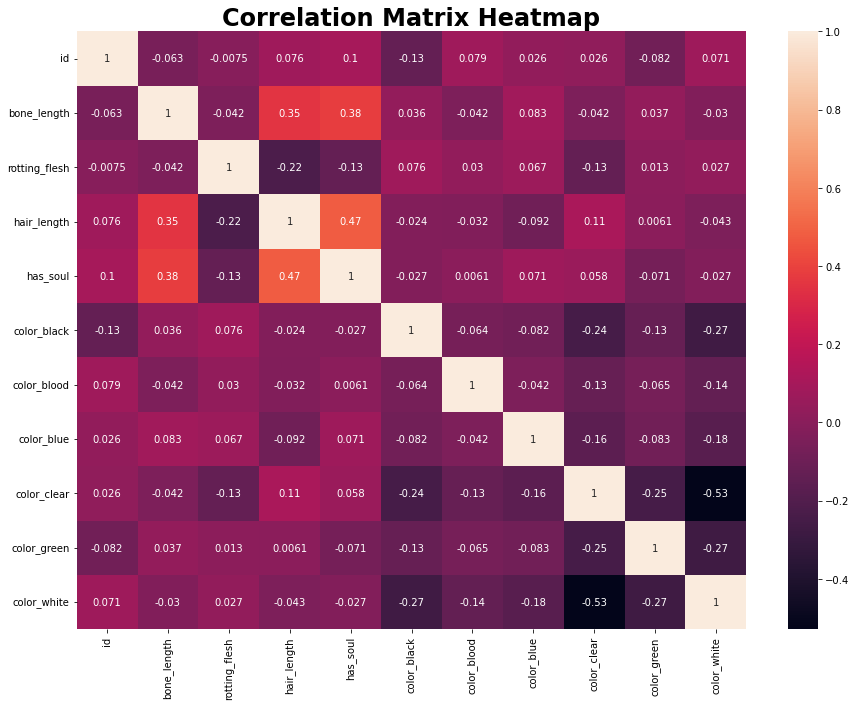

In [9]:
correlation_matrix = df1.corr()

plt.figure(figsize=(15, 11))
sns.heatmap(df1.corr(), annot=True)
plt.title('Correlation Matrix Heatmap',fontsize=24, fontweight='bold')
plt.show()

Lets observe the frequency distributions of the features in the data.

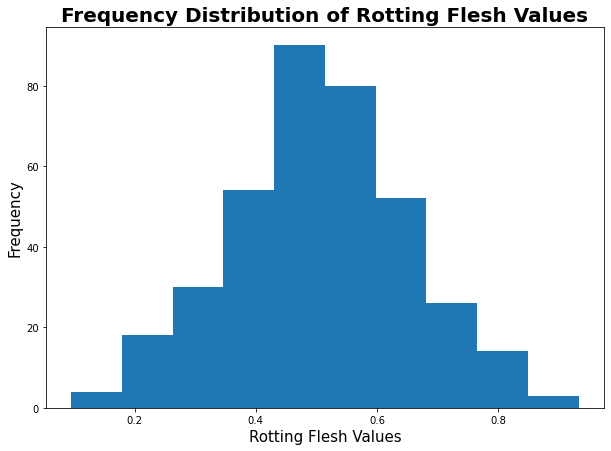

In [10]:
plt.figure(figsize=(10, 7))
plt.hist(df1['rotting_flesh'])
plt.xlabel('Rotting Flesh Values',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Frequency Distribution of Rotting Flesh Values',fontsize=20, fontweight='bold')
plt.show()

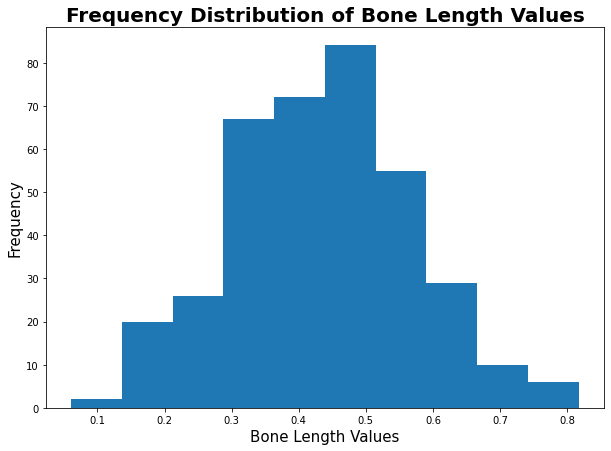

In [11]:
plt.figure(figsize=(10, 7))
plt.hist(df1['bone_length'])
plt.xlabel('Bone Length Values',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Frequency Distribution of Bone Length Values',fontsize=20, fontweight='bold')
plt.show()

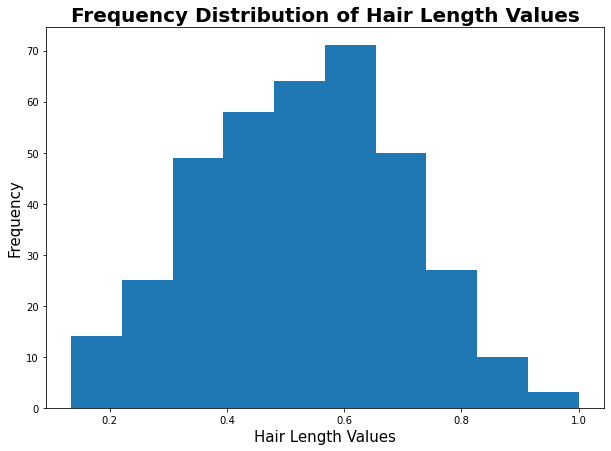

In [12]:
plt.figure(figsize=(10, 7))
plt.hist(df1['hair_length'])
plt.xlabel('Hair Length Values',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Frequency Distribution of Hair Length Values',fontsize=20, fontweight='bold')
plt.show()

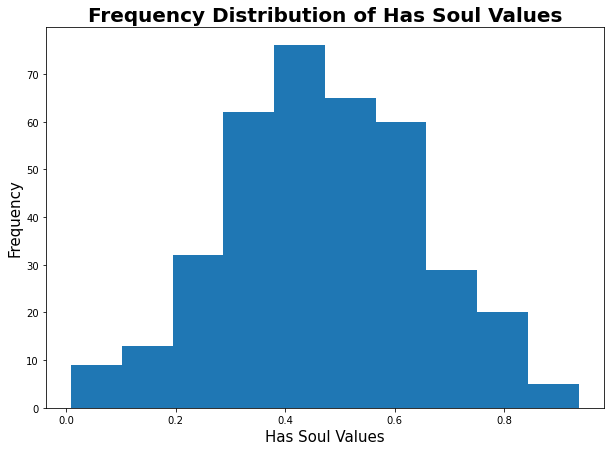

In [13]:
plt.figure(figsize=(10, 7))
plt.hist(df1['has_soul'])
plt.xlabel('Has Soul Values',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Frequency Distribution of Has Soul Values',fontsize=20, fontweight='bold')
plt.show()

The features are almost following the normal distribution. But the rotting flesh values are more towards the normal distribution. So lets see how the distribution follows for each type of the target variable. 

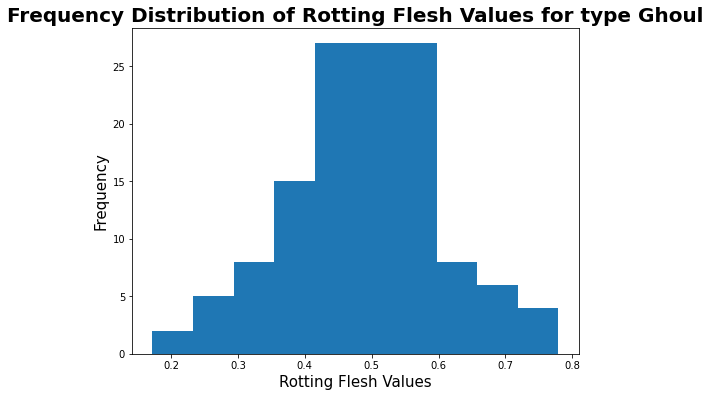

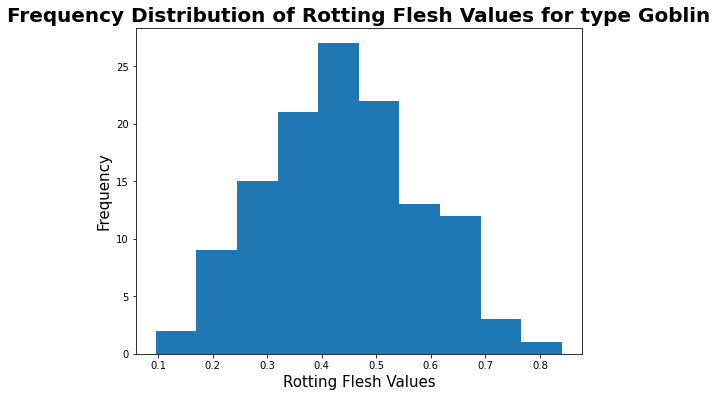

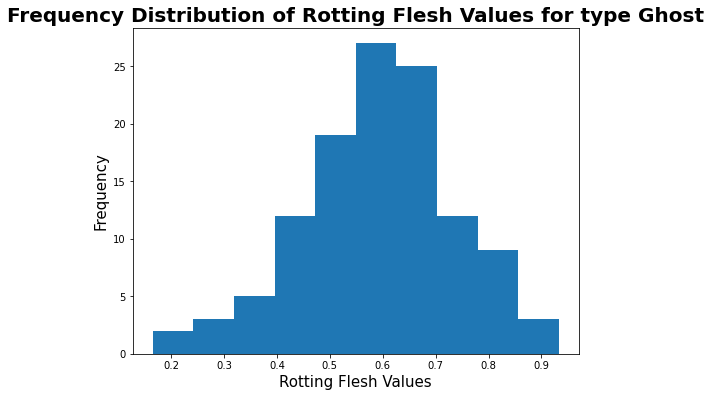

In [14]:
unique_types = df1['type'].unique()


for ut in unique_types:
    plt.figure(figsize=(8, 6))
    plt.hist(df1[df1['type'] == ut]['rotting_flesh'])
    plt.xlabel('Rotting Flesh Values',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title(f'Frequency Distribution of Rotting Flesh Values for type {ut}',fontsize=20, fontweight='bold')
    plt.show()  

We can see that ghoul and goblin are almost having similar distribution. This isnt much usefull as it wouldnt contribute much in classification due to similar distribution. So it may not be quite usefull for the classification. This further raises my doubts on other features. So lets plot the distributions for all features.

So lets use the density distribution for the features for each type of the creatures. As we have only 3 types its not too hard to visualize and usefull in understanding the relevance of features.

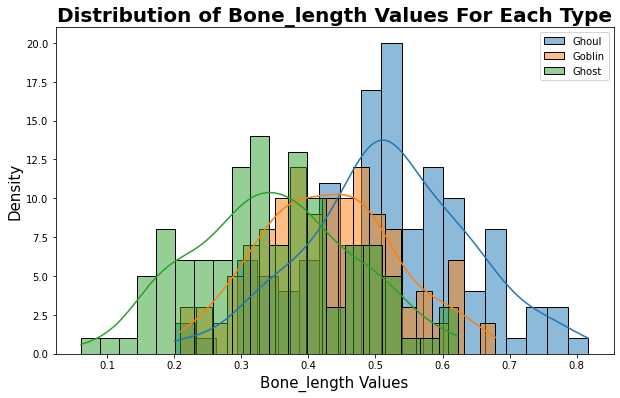

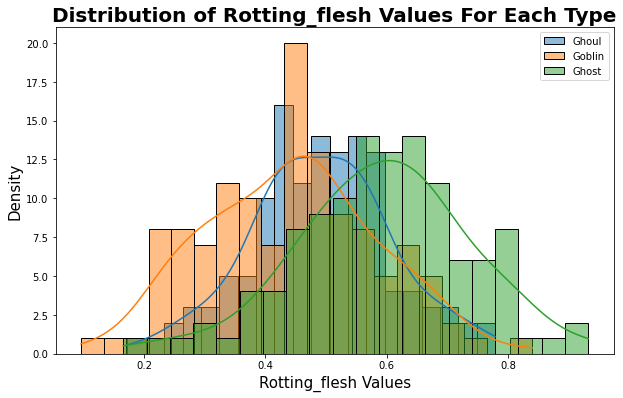

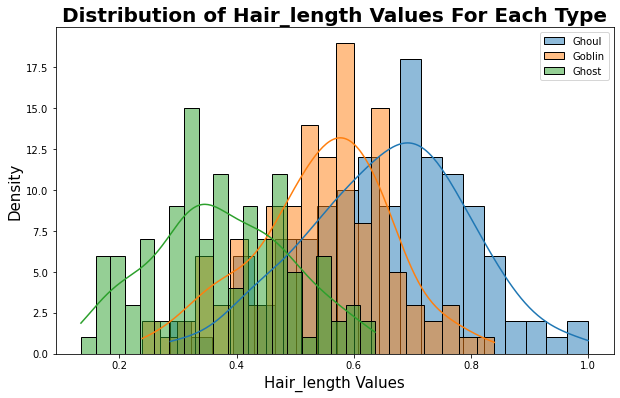

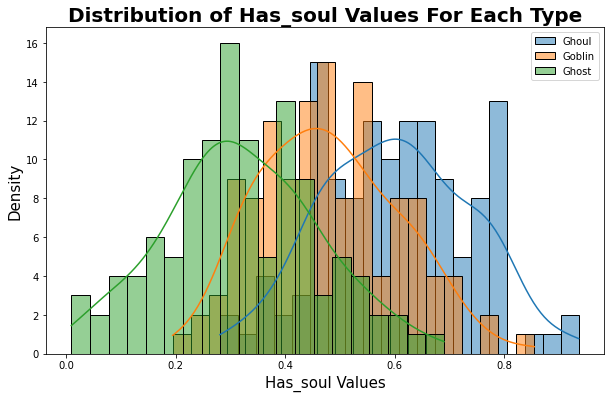

In [16]:
features = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']

unique_types = df1['type'].unique()

for feature in features:
    plt.figure(figsize=(10, 6))
    
    for ut in unique_types:
        data = df1[df1['type'] == ut][feature]
        sns.histplot(data, kde=True, label=ut, bins=20)

    plt.xlabel(f'{feature.capitalize()} Values',fontsize=15)
    plt.ylabel('Density',fontsize=15)
    plt.title(f'Distribution of {feature.capitalize()} Values For Each Type',fontsize=20, fontweight='bold')
    plt.legend()
    plt.show()

All the features are having good distribution and tehy are identifieable. But the rotting flesh variable is having quite good similarity for goblin and ghoul. So we will try to run the models with out the feature as removing it right now with this reasoning is not optimal way to proceed.

Lets also see how the colors of the creatres are distributed.

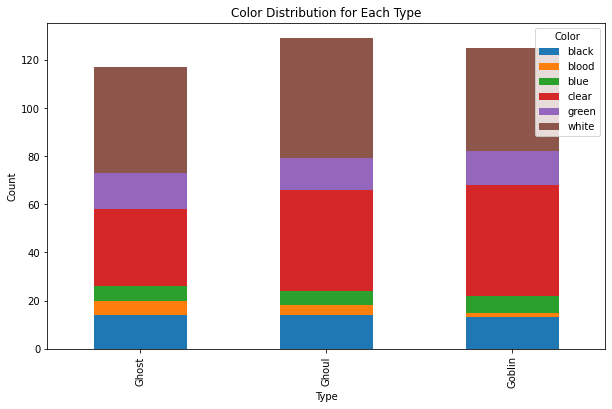

In [17]:
color_counts = df_train.groupby(['type', 'color']).size().unstack()

color_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Color Distribution for Each Type')
plt.legend(title='Color')
plt.show()

### Model Creation and Testing

Colors is another field where they are evenly distributed among the creatures. So we can try to see how the model function without color and rotting flesh variables. 

In [18]:
features = df_train.drop(['id', 'type','color','rotting_flesh'], axis=1)  
target = df_train['type']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [ ]:
#L1 Logestic Regression :-

In [19]:
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6875


The accuracy value is quite low and may be the exclusion of the features casuing this issue. So lets use the colors and rotten flesh variable. As you aware in earlier steps i encoded color feature.

In [20]:
features = df1.drop(['id', 'type'], axis=1)
target = df1['type']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [21]:
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.75


As we observed that the logestic regression is working good, lets try to improve it with the one vs one which are good with multi class classification.

In [22]:
# One vs One

In [23]:
logistic_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
ovo_classifier = OneVsOneClassifier(logistic_reg)
ovo_classifier.fit(X_train, y_train)
predictions = ovo_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7053571428571429


In [24]:
# One vs Rest

In [25]:
logistic_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
ovr_classifier = OneVsRestClassifier(logistic_reg)
ovr_classifier.fit(X_train, y_train)
predictions = ovr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.75


In [26]:
# Softmax Regression

In [27]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
softmax_reg.fit(X_train, y_train)
predictions = softmax_reg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6964285714285714


In [28]:
# Knn model

In [29]:
neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6517857142857143


In [30]:
# Lets try with different numbe of neighbours

In [31]:
neighbors_list = [2, 3, 5, 7, 9, 11, 15, 20]
accuracy_scores = {}

for n in neighbors_list:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train)
    
    predictions = neigh.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores[n] = accuracy

for n, accuracy in accuracy_scores.items():
    print(f"Neighbors: {n}, Accuracy: {accuracy}")


Neighbors: 2, Accuracy: 0.6875
Neighbors: 3, Accuracy: 0.6517857142857143
Neighbors: 5, Accuracy: 0.6517857142857143
Neighbors: 7, Accuracy: 0.6607142857142857
Neighbors: 9, Accuracy: 0.6428571428571429
Neighbors: 11, Accuracy: 0.6696428571428571
Neighbors: 15, Accuracy: 0.6607142857142857
Neighbors: 20, Accuracy: 0.6607142857142857


In [32]:
# Adaboost - Logestic regression

In [ ]:
lm = LogisticRegression(penalty='l1', C=600, solver='liblinear')
lm.fit(X_train, y_train)

ada_lm = AdaBoostClassifier(base_estimator=lm)
ada_lm.fit(X_train, y_train)
predictions = ada_lm.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


out of all, we can observe that one vs rest version of logestic regression performing well. So we will use it as our final model.

In [34]:
features = df1.drop(['id', 'type'], axis=1)
target = df1['type']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
logistic_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
ovr_classifier = OneVsRestClassifier(logistic_reg)
ovr_classifier.fit(X_train, y_train)
predictions = ovr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.75


In [35]:
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [36]:
df3 = pd.get_dummies(df_test, columns=['color'])

In [37]:
test_features = df3.drop(['id'], axis=1)
test_predictions = ovr_classifier.predict(test_features)
submission_df = pd.DataFrame({'id': df_test['id'], 'type': test_predictions})


In [38]:
submission_df.head()

,id,type
0,3,Ghoul
1,6,Ghoul
2,9,Ghoul
3,10,Ghost
4,13,Ghost


In [39]:
submission_df.to_csv('~/submission.csv', index=False)

# Submission

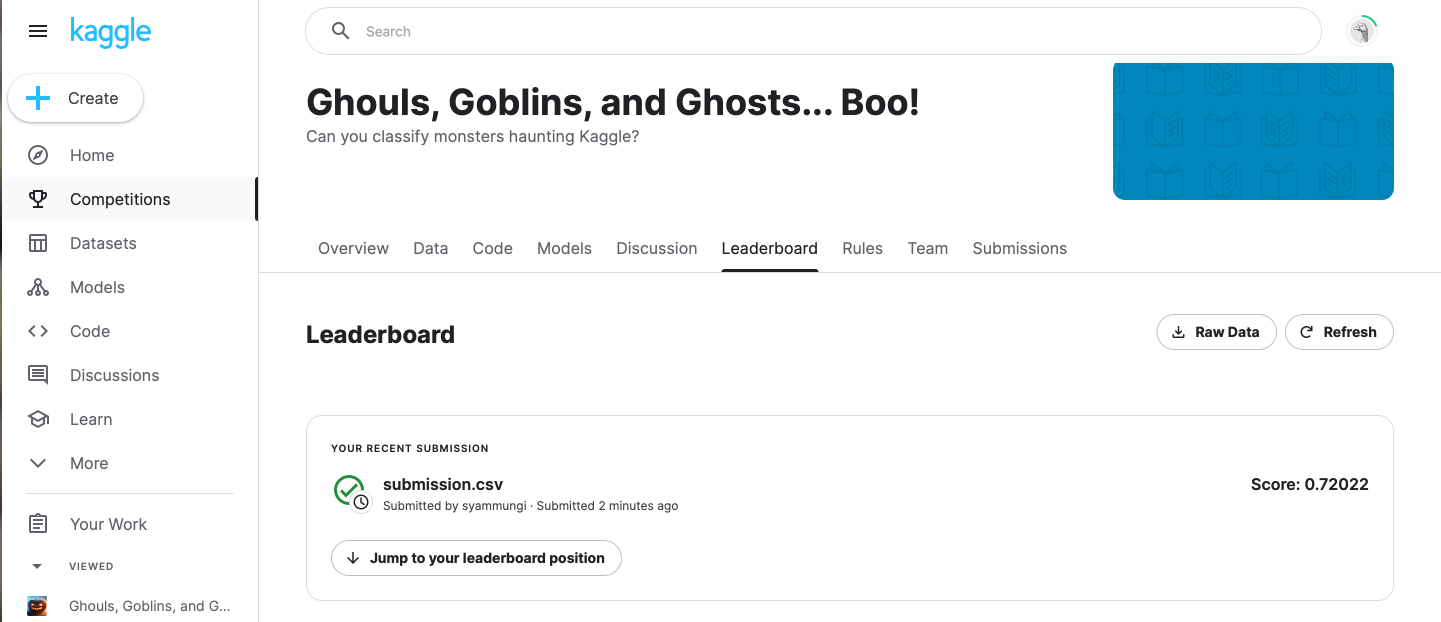